# 08 Linear Dynamical Systems

<center>Modeling an epidemic</center>
<center><img src="figs/08_sir.png" alt="default" width=550px/></center>

#### Unit 1: Vectors, Book ILA Ch. 1-5

#### Unit 2: Matrices, Book ILA Ch. 6-11 + Book IMC Ch. 2
- **_06 Matrices_**
- **_07 Linear Equations_**
- 08 Linear Dynamical Systems
- 09 Matrix Multiplication
- 10 Matrix Inverse

#### Unit 3: Least Squares, Book ILA Ch. 12-14 + Book IMC Ch. 8
#### Unit 4: Eigen-decomposition, Book IMC Ch. 10, 12, 19

# Exercises

$\color{#047C91}{\text{Exercise}}$: Let $0_n$ be the $n \times n$ zeroes matrix and $x$ an $n$-vector. Compute $0_nx$.


$\color{#047C91}{\text{Exercise}}$: Consider a function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$, that is affine. What is the matrix $A$ and the vector $b$ such that: $f(x) = Ax + b$?

#### Unit 1: Vectors, Book ILA Ch. 1-5

#### Unit 2: Matrices, Book ILA Ch. 6-11 + Book IMC Ch. 2
- 06 Matrices
- 07 Linear Equations
- **_08 Linear Dynamical Systems_**
- 09 Matrix Multiplication
- 10 Matrix Inverse

#### Unit 3: Least Squares, Book ILA Ch. 12-14 + Book IMC Ch. 8
#### Unit 4: Eigen-decomposition, Book IMC Ch. 10, 12, 19

# Outline: 08 Linear Dynamical Systems

- **[Linear dynamical systems](#sec-matrices)**
- [Epidemic dynamics](#examples)

# State sequence

$\color{#EF5645}{\text{Definition}}$: Consider a sequence of $n$-vectors $x_1, x_2, ..., x_t, ...$ where $t$ denotes the time or period. Then:
- $x_t$ is called a state at time $t$, or a time-point
- the sequence $x_1, x_2, ..., x_t, ...$ is called a state trajectory or a time-series. 

Assuming $t$ is the current time:
- $x_t$ is the current state,
- $x_{t-1}$ is the previous state,
- $x_{t+1}$ is the next state.

# Covid-19 in Santa Barbara

In [2]:
import pandas as pd

filename = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
df_covid = pd.read_csv(filename)
df_sb = df_covid[df_covid["Admin2"] == "Santa Barbara"]
df_sb.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21
239,84006083,US,USA,840,6083.0,Santa Barbara,California,US,34.653295,-120.018849,...,45223,45223,45223,45223,45446,45506,45579,45650,45650,45650


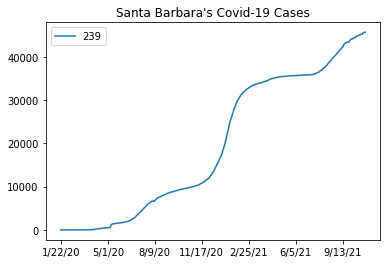

In [71]:
df_timeseries = df_sb.drop(
    columns=[
        "Combined_Key", "UID", "iso2", "iso3", "code3", 
        "FIPS", "Admin2", "Province_State", "Country_Region", 
        "Lat", "Long_"])
df_timeseries.transpose().plot(
    title="Santa Barbara's Covid-19 Cases");

# Other Examples

- epidemiology: susceptible, infected, recovered and deaths at $t$
- mechanics: position and velocity of plane through time $t$
- finance: return of $n$ assets at time $t$
  
 
 $\color{#047C91}{\text{Exercise}}$: In these examples, what is the state $x_t$?

# Linear Dynamical System

$\color{#EF5645}{\text{Definition}}$: A linear dynamical system is a linear equation describing the evolution of a state over time, and written as:
$$ x_{t+1} = A_t x_t \quad t = 1, 2, ...$$
where:
- $A_t$ are $n \times n$ dynamics matrices,
- $(A_t)_{ij} (x_t)_j$ is contribution to $(x_{t+1})_i$ from $(x_t)_j$.

The system is called time-invariant if $A_t = A$ does not depend on time.

$\color{#003660}{\text{In Python}}$: We can simulate evolution of $x_t$ using for loops to compute:
$$x_{t+1} = A_t x_t$$
recursively (see later slide on the epidemics model).

# Variations: Linear Dynamical System with Input

$\color{#EF5645}{\text{Definition}}$: The following system is called a linear dynamical system with input:
$$ x_{t+1} = A_t x_t + B_t u_t + c_t\quad t = 1, 2, ...$$
- $u_t$ is an input $m$-vector
- $B_t$ is $n \times m$ input matrix
- $c_t$ is offset.

# Outline: 08 Linear Dynamical Systems

- [Linear dynamical systems](#sec-matrices)
- **[Epidemic dynamics](#examples)**

# SIR Model

$\color{#EF5645}{\text{Definition}}$: The Susceptible-Infected-Recovered (SIR) model of an epidemic is a linear dynamical system defined on a $4$-vector state $x_t$, that gives the proportion of the population in $4$ infection states:
- Susceptible: can acquire the disease the next day 
- Infected: have the disease 
- Recovered: had the disease, recovered, now immune 
- Deceased: had the disease, and unfortunately died 

$\color{#047C91}{\text{Example of state}}$: $x_t = (0.75, 0.10, 0.10, 0.05)$


$\color{#047C91}{\text{Exercise}}$ Write the linear dynamical system associated to this epidemic.
- among susceptible population
  - 5% acquires the disease 
  - 95% remain susceptible
- among infected population
  - 1% dies
  - 10% recovers with immunit
  - 4% recover without immunity (i.e., become susceptible) 
  - 85% remain infected
- 100% of immune and dead people remain in their state




# Simulation from $x_0 = (1, 0, 0, 0)$

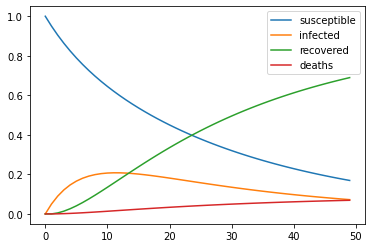

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x0 = np.array([1, 0, 0, 0])
A = np.array([[0.95, 0.04, 0, 0],[0.05, 0.85, 0, 0],[0, 0.1, 1, 0],[0, 0.01, 0, 1]    ])
n_times = 50
times = np.arange(0, n_times, 1); #print(times)
x_current = x0 ; states = []
for time in times:
    x_next = A @ x_current
    states.append(x_current)
    x_current = x_next
    
plt.plot(times, [x[0] for x in states], label="susceptible")
plt.plot(times, [x[1] for x in states], label="infected")
plt.plot(times, [x[2] for x in states], label="recovered")
plt.plot(times, [x[3] for x in states], label="deaths")

plt.legend()

# Outline: 08 Linear Dynamical Systems

- [Linear dynamical systems](#sec-matrices)
- **[Epidemic dynamics](#examples)**

Resources: Book ILA Ch. 09